# DSM (bar)

[0.79365079 1.58730159 2.38095238]


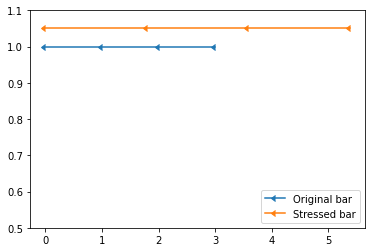

In [1]:

import sympy
import numpy
import matplotlib.pyplot as plt
from sympy import sin, cos, tan, diff, solve

class bar:
  
    def __init__(self,l,E,A,P,n):
        #here are the input parameters
        self.l = l
        self.E = E
        self.A = A
        self.P = P
        self.n = n
        
    def Calculate_ke(self):
        self.le = self.l/self.n
        self.ke = numpy.zeros((2,2))                 
        self.ke[0,0] = self.E*self.A/self.le
        self.ke[0,1] = -self.E*self.A/self.le
        self.ke[1,0] = -self.E*self.A/self.le        
        self.ke[1,1] =  self.E*self.A/self.le         
        return self.ke
    
    def Calculate_K(self):
        self.Calculate_ke()
        self.K = numpy.zeros((self.n + 1,self.n + 1))        
        # loading Id matrix
        Id = numpy.zeros((3,2))           
        Id[0,0] = 0;         Id[0,1] = 1 # element 1
        Id[1,0] = 1;         Id[1,1] = 2 # element 2
        Id[2,0] = 2;         Id[2,1] = 3 # element 3

        
        for i in range(self.n):
            for j in range(2):
                for k in range(2):
                    # l = Id[i,j]
                    # m = Id[i,k]   
                     self.K[int(Id[i,j]),int(Id[i,k])] = + self.ke[j,k]  + self.K[int(Id[i,j]),int(Id[i,k])] #

        return self.K  
    
    def Define_Load_Vector(self):
        # global load vector
        self.F = numpy.zeros(self.n) 
        self.F[self.n-1] = 5000        
        return self.F
    
    def Calculate_Kred(self):
        row_red = 0
        self.Id_const = numpy.zeros(self.n + 1)
        # if dof is fixed insert 1
        self.Id_const[0] = 1
        size_Kred = self.n+1 - numpy.count_nonzero(self.Id_const)
        self.Kred = numpy.zeros((size_Kred,size_Kred))   
        for i in range(self.n+1):
            col_red = 0
            for j in range(self.n+1): 
                if(self.Id_const[i]!=1 and self.Id_const[j]!=1):                    
                    self.Kred[row_red,col_red] = self.K[i,j]
                if(self.Id_const[j]!=1):  
                     col_red = col_red + 1   
            if(self.Id_const[i]!=1):                    
                     row_red = row_red + 1            
        return self.Kred            
                
    def Solve_System(self):
        self.u = numpy.dot(numpy.linalg.inv(self.Kred),self.F)
        return self.u

    def Update_positions(self):
        disp_const = 0
        self.x0 = numpy.zeros(self.n + 1)
        self.xupd = numpy.zeros(self.n + 1)
        
        for j in range(self.n+1): 
            self.x0[j] = self.le*j
            self.xupd[j] = self.x0[j]
            if(self.Id_const[j]!=1):  
                self.xupd[j] = self.xupd[j] + self.u[disp_const]                    
                disp_const = disp_const + 1
        return self.x0, self.xupd     

    
    def Plot_displacements(self):
        # plots original and deformed bar lengths
        plt.ylim(0.5,1.1)
        y = [1] * (self.n + 1)
        yupd = [1.05] * (self.n + 1)        
        plt.plot(self.x0,y,label="Original bar",marker=8)
        plt.plot(self.xupd,yupd, label="Stressed bar",marker=8)
        plt.legend(loc="lower right")
    
        
def main():
  bar_1D = bar(3,210e5,0.0003,2000,3)  
  bar_1D.Calculate_K()
  bar_1D.Define_Load_Vector()    
  bar_1D.Calculate_Kred()
  print(bar_1D.Solve_System())
  bar_1D.Update_positions()
  bar_1D.Plot_displacements()  
if __name__ == '__main__':
    main()    